类别特征 categorical feature 也成为 离散特征 discrete feature
类别特征很难用数字去表达,它是不连续的方式变化

例如以下例子中 个人的名字无法用数字去表达

或者说，我们正在寻找一种二进制编码。用机器学习的术语来说，这被称为独热编码（one-hot encoding),它由大多数机器学习包直接提供

In [37]:
# 定义一个初始的数据集合
data = [
    {'name': 'Alan Turing', 'born': 1912, 'died': 1954},
    {'name': 'Herbert A. Simon', 'born': 1916, 'died': 2001},
    {'name': 'Jacek Karpinski', 'born': 1927, 'died': 2010},
    {'name': 'J.C.R. Licklider', 'born': 1915, 'died': 1990},
    {'name': 'Marvin Minsky', 'born': 1927, 'died': 2016},
]

在sklearn 中one-hot encoding 是在 DictVectorizer  (编码转换器) 类别中
可在feature_extraction 中找到

工作方式：传入字典,自动确认编码的特征

In [38]:
'''one - hot 编码'''
from sklearn.feature_extraction import DictVectorizer
import matplotlib.pyplot as plt
import numpy as np
vec = DictVectorizer(separator=False,dtype=int) # 类别
# 转换调用
vec.fit_transform(data)
vec.get_feature_names()

['born',
 'died',
 'nameFalseAlan Turing',
 'nameFalseHerbert A. Simon',
 'nameFalseJ.C.R. Licklider',
 'nameFalseJacek Karpinski',
 'nameFalseMarvin Minsky']

图像特征的表示
    图像最直接的方式是使用图像中每个像素的灰度值

使用颜色空间:
    1.RGB空间
        RGB空间的颜色通道顺序是 B,G,R 故而图片的文件格式为.jpg
        在opencv 中 彩色图像实际上是存储BGR图像的，颜色通道的顺序是bgr 而不是rgb
        而matplotlib显示图片则是需要一个rgb图像


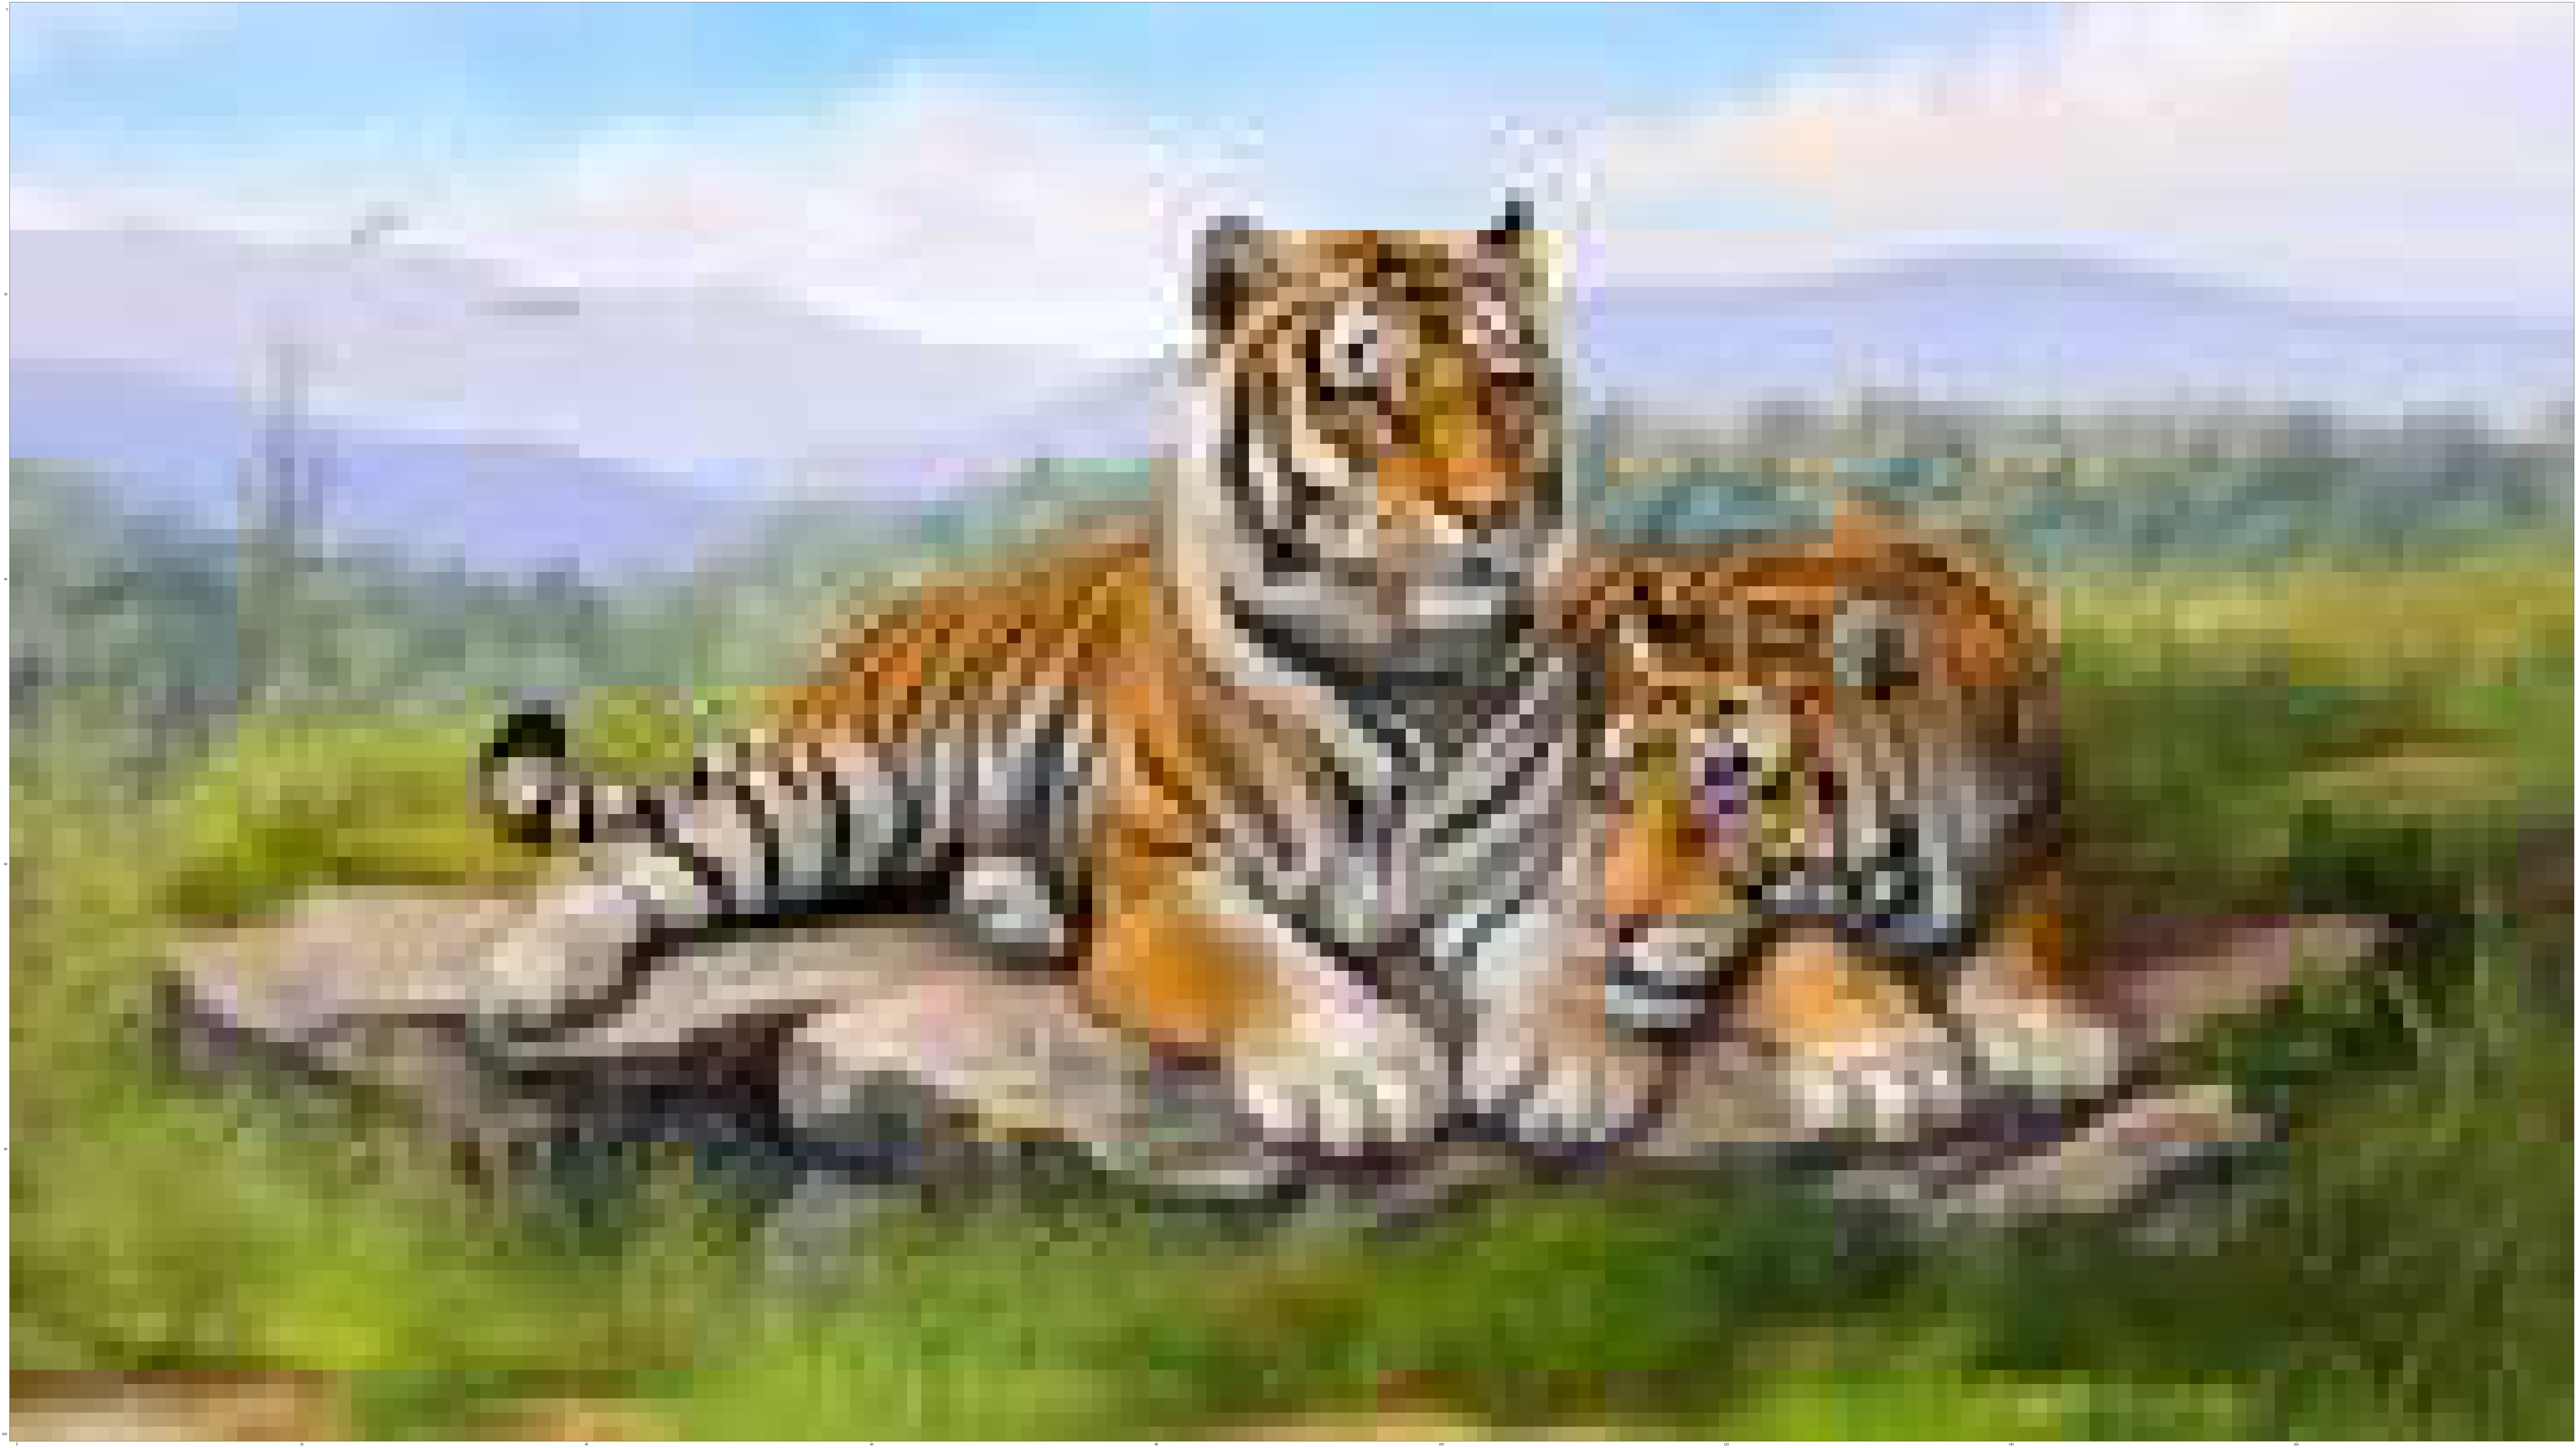

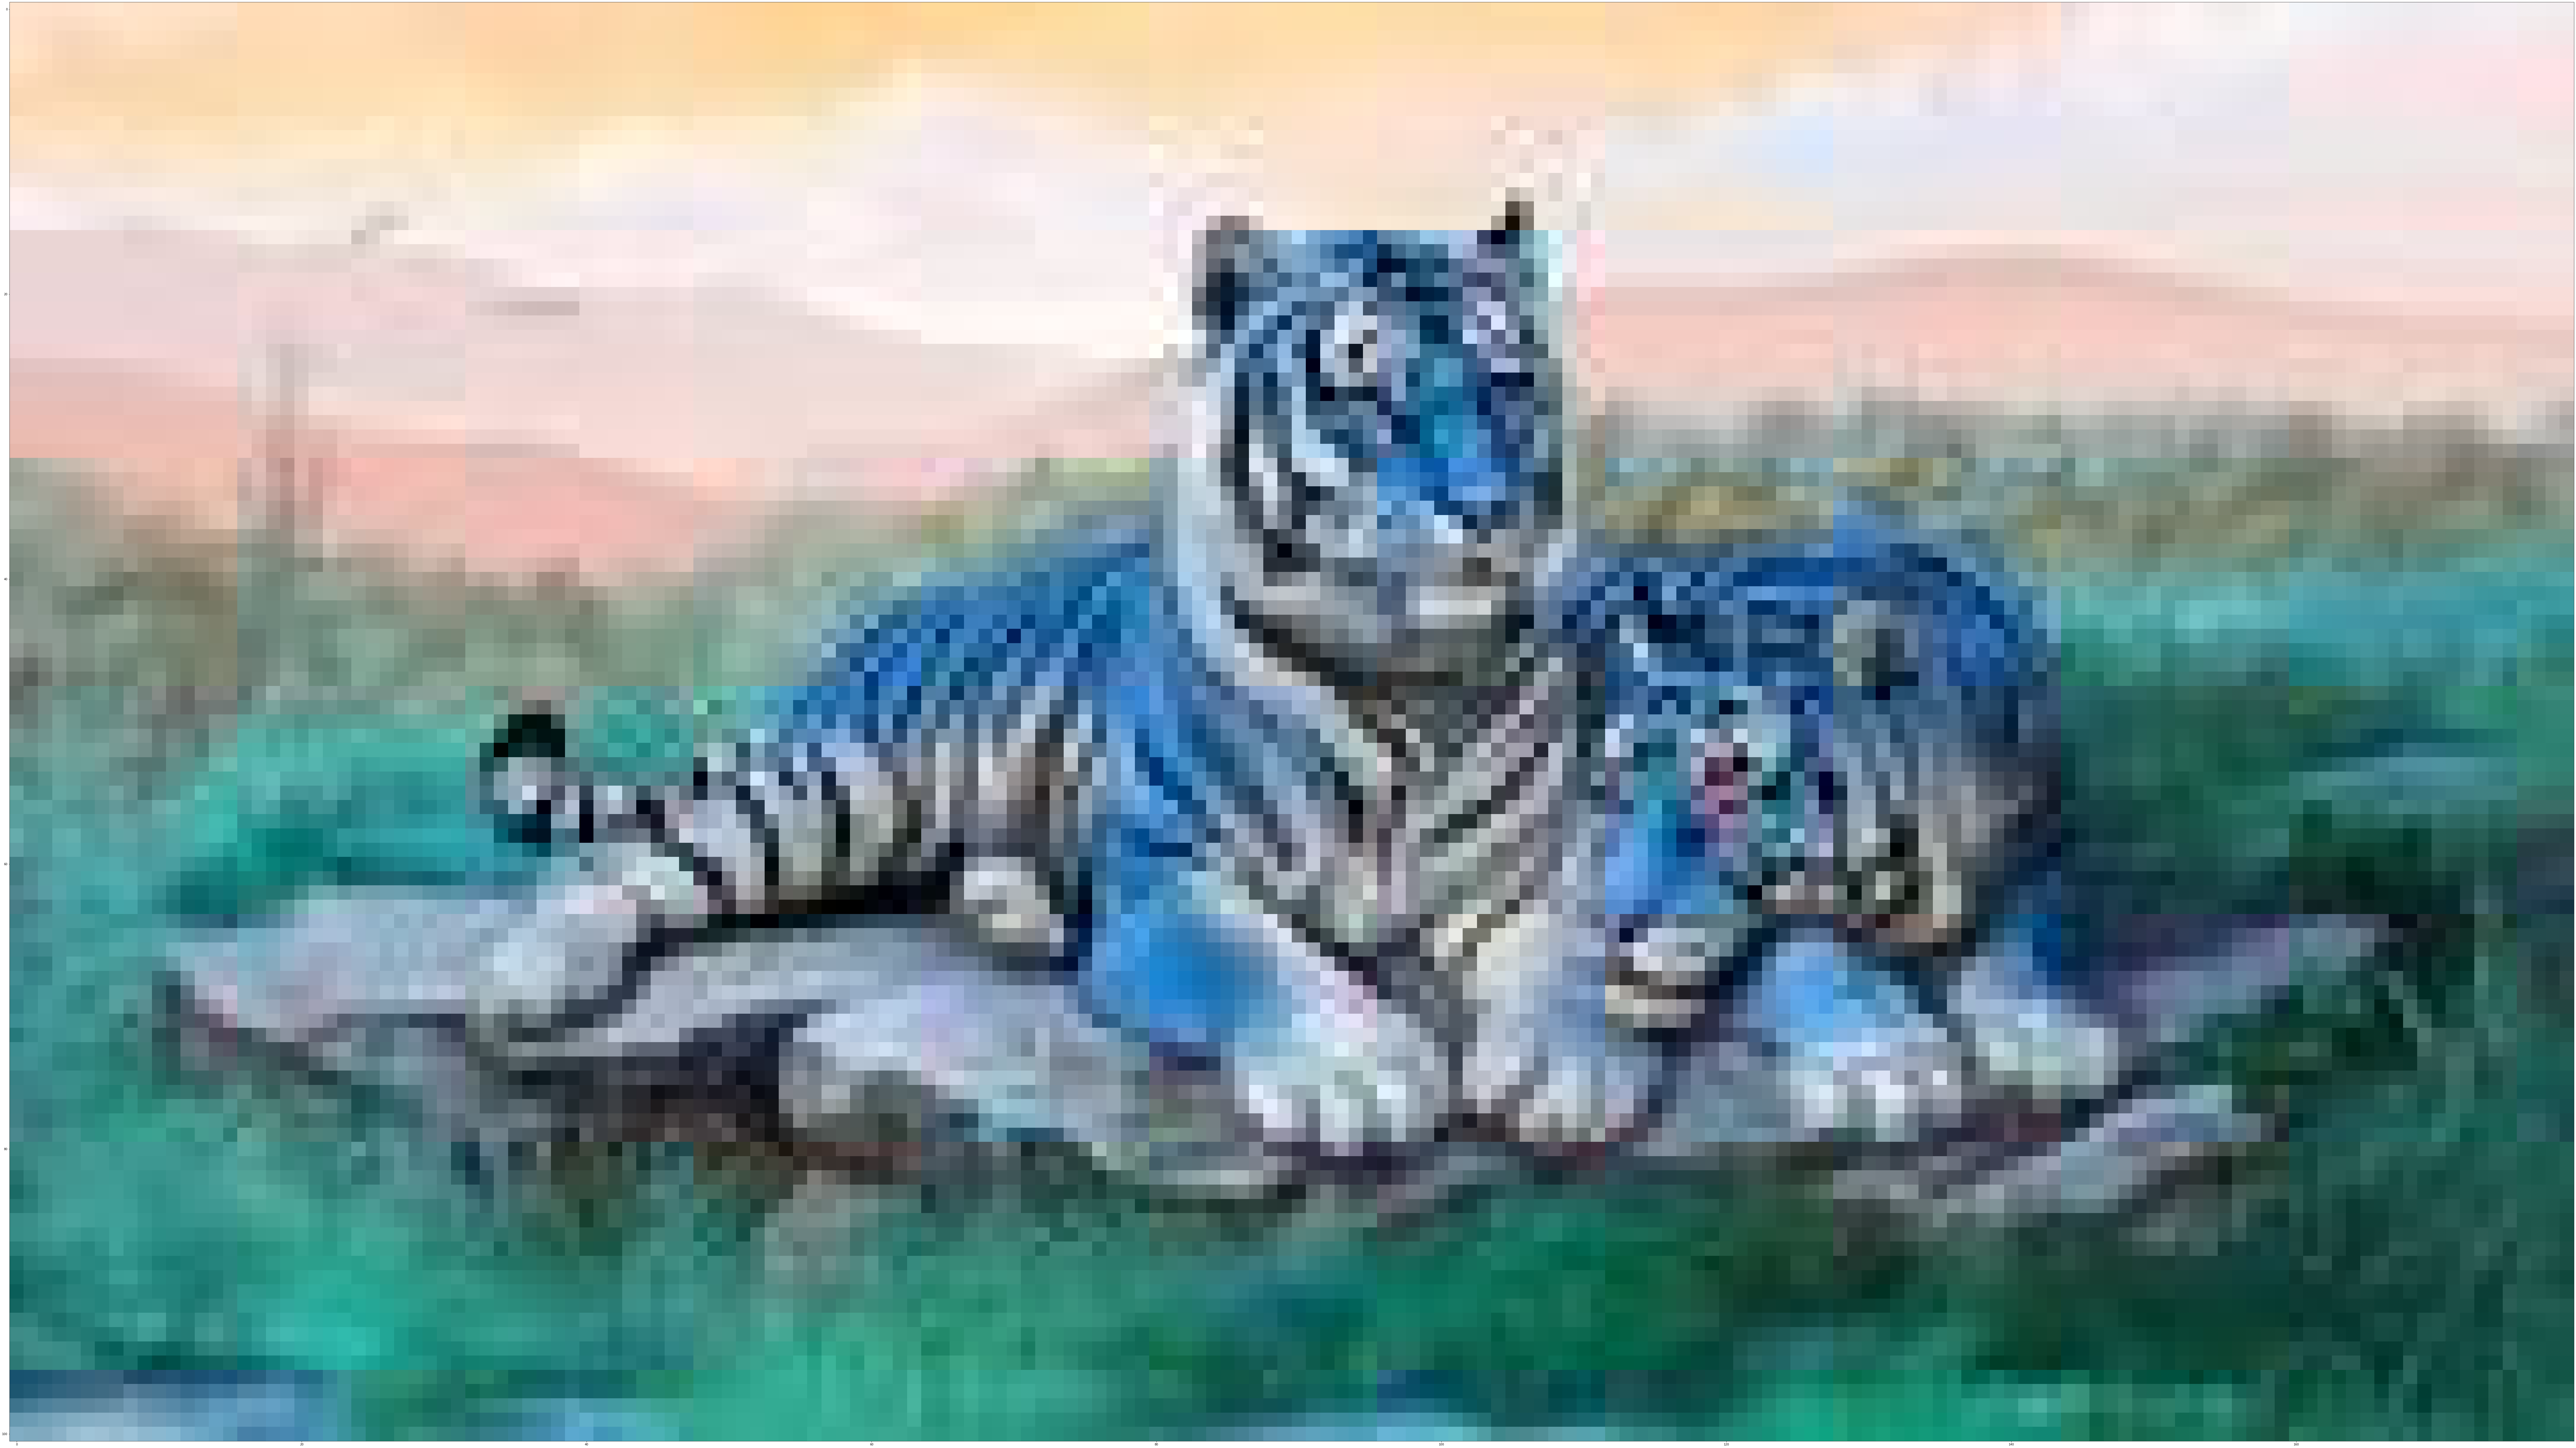

In [39]:
import cv2
img_bgr = cv2.imread('figures/tiger.jpg') #cv2的读取为bgr图片
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(160,100))
plt.imshow(img_rgb) # plt 显示的图片通道应该为RGB

plt.figure(figsize=(160,100))
plt.imshow(img_bgr)



RGB和CMY颜色模型都是面向硬件的，而HSV（Hue Saturation Value）颜色模型是面向用户的。
    RGB模型，常见的硬件显示通道，
    CMY是青（Cyan）、洋红（或品红）（Magenta）和黄（Yellow）三种颜色的简写，加上黑色（Black），即为CMYK相减混色模式，用这种方法产生的颜色之所以称为相减色，乃是因为它减少了为视觉系统识别颜色所需要的反射光。

    【C，M，Y】 = 【1，1，1】-【R，G，B】
    CMY和RGB其实是互补的颜色类型，以上假设所有的颜色全部归一化到了[0,1]之间，C M Y 主要表示颜料的表面所反射的颜色，上式表明涂有青色颜料的表面所反射的光中不包含红色，类似的，纯深红色不反射绿色，纯黄色不反射蓝色。所以CMY其实就是RGB的补色
    因为CMY所组合的颜色不是纯黑，所以为了产生真正的黑色，我们一般在模型里面加入CMYK的k即代表黑色。


HSV空间（Hue色调，Saturation饱和度，Value，明度值）
HLS空间（Hue色调，Lighting亮度，Saturation ，饱和度
单色调通道捕获颜色的色调
饱和度通道捕获色度
明度或者值通道捕获明度（lightness）或者亮度（brightness）。

In [43]:
'''BGR 色彩空间convert to HSV空间'''
img_hsv = cv2.cvtColor(img_rgb,cv2.COLOR_RGB2HSV)
img_hls = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2HLS)

检测图像中的角点（几条边相交的位置）
1.Harris角点检测
    思想：边缘是在各个方向上都具有高密度变化的区域
        算法基本思想是使用一个固定窗口在图像上进行任意方向上的滑动，比较滑动前与滑动后两种情况，窗口中的像素灰度变化程度，如果存在任意方向上的滑动，都有着较大灰度变化，那么我们可以认为该窗口中存在角点。

    角点的特征：
        >轮廓之间的交点；
        >对于同一场景，即使视角发生变化，通常具备稳定性质的特征；
        >该点附近区域的像素点无论在梯度方向上还是其梯度幅值上有着较大变化；


In [ ]:
cv2.cornerHarris()